# Data Shape
We can get the raw data using `parse`.

In [68]:
import colosseum_analysis as ca
d_1017_raw = ca.parse('plain_data/gensync_985751322_1017.csv')
d_1017_raw

,algorithm,server,client,cardinality,success,bytes transmitted,bytes received,communication time(s),idle time(s),computation time(s)
0,CPI,0,0,10000,True,13.0,62.0,0.480089,0.000000,30.020700
1,CPI,0,0,10000,True,62.0,13.0,0.359874,0.265700,0.000033
2,CPI,0,0,10000,True,13.0,62.0,0.480092,0.000000,0.130434
3,CPI,0,0,10000,True,62.0,13.0,0.359872,0.286035,0.000028
4,CPI,0,0,10000,True,13.0,62.0,0.479927,0.000000,0.129543
...,...,...,...,...,...,...,...,...,...,...
1315,Cuckoo,1000,1000,10000,True,36023.0,35964.0,0.548040,0.081242,0.038412
1316,Cuckoo,1000,1000,10000,True,21590.0,36023.0,0.441711,0.000000,0.040792
1317,Cuckoo,1000,1000,10000,True,36023.0,35964.0,0.546906,0.081442,0.039721
1318,Cuckoo,1000,1000,10000,True,21590.0,36023.0,0.441867,0.000000,0.040778


Each data set parsed this way contains an even number of rows. A row with an even index represents the *GenSync* server's view, while rows with odd indices represent the corresponding client views.

We can also get summary dataset using the `summarize` option.

In [33]:
d_1017 = ca.parse('plain_data/gensync_985751322_1017.csv', summarize=True)
d_1017

,algorithm,diffs,cardinality,success,bytes exchanged,ttr
0,CPI,0,10000,True,75.0,30.500789
1,CPI,0,10000,True,75.0,0.645935
2,CPI,0,10000,True,75.0,0.645802
3,CPI,0,10000,True,75.0,0.620693
4,CPI,0,10000,True,75.0,28.222602
...,...,...,...,...,...,...
655,Cuckoo,1000,10000,True,71987.0,0.658211
656,Cuckoo,1000,10000,True,71987.0,0.679445
657,Cuckoo,1000,10000,True,71987.0,0.667694
658,Cuckoo,1000,10000,True,71987.0,0.668069


Here each row represents one experiment run. `bytes exchanged` is the summary communication among the peers. `ttr` is the total time to reconcile.
Total time to reconcile (TTR) is obtained by combining each pair of rows in the raw data using 

$$TTR = \max_{server, client}( computeTime + communicationTime + idleTime ).$$

And the communication cost (COM) is obtained by summing `bytes transmitted` and `bytes received`.

To get the number of experiment runs for each `algorithm`, `diffs` and `cardinality`:

In [58]:
d_1017_groups = d_1017.groupby(['algorithm', 'diffs', 'cardinality'])
len(d_1017_groups.groups[('CPI', 10, 10000)])

10

The number of different cardinalities in the data set is

In [60]:
len(d_1017['cardinality'].unique())

1

## Colosseum Scenarios
Each `csv` file is obtained under single Colosseum cellular [scenario](https://colosseumneu.freshdesk.com/support/solutions/articles/61000295793). 

Next we plot the TTR performance of the three algorithms against differences count under scenario 1017. `d_1017` contains the measurements for the "Rome" scenario where devices are static and close to the base station (within 20 m). `d_1018` holds data for the similar scenario where the devices move moderately (up to 3 m/s).

In [57]:
d_1018 = ca.parse('plain_data/gensync_974396656_1018.csv', summarize=True)

### Average per experiment run

In [67]:
d_1017_CPI_10 = d_1017.loc[d_1017_groups.groups[('CPI', 10, 10000)]]
d_1017_CPI_10

,algorithm,diffs,cardinality,success,bytes exchanged,ttr
330,CPI,10,10000,True,231.0,30.568804
331,CPI,10,10000,True,231.0,28.721739
332,CPI,10,10000,True,231.0,1.624702
333,CPI,10,10000,True,231.0,5.382294
334,CPI,10,10000,True,231.0,26.898956
335,CPI,10,10000,True,231.0,0.822753
336,CPI,10,10000,True,231.0,0.885706
337,CPI,10,10000,True,231.0,0.638614
338,CPI,10,10000,True,231.0,0.652970
339,CPI,10,10000,True,231.0,5.465376


Why do some of these runs have this huge `ttr`?
- Some runs just have very high computation times.

In [71]:
d_1017_raw[(d_1017_raw['algorithm'] == 'CPI') & (d_1017_raw['server'] == 10)]

,algorithm,server,client,cardinality,success,bytes transmitted,bytes received,communication time(s),idle time(s),computation time(s)
660,CPI,10,10,10000,True,89.0,142.0,0.480904,0.000000,30.087900
661,CPI,10,10,10000,True,142.0,89.0,0.361817,0.262686,0.000084
662,CPI,10,10,10000,True,89.0,142.0,0.481239,0.000000,28.240500
663,CPI,10,10,10000,True,142.0,89.0,0.362096,0.283720,0.000105
664,CPI,10,10,10000,True,89.0,142.0,0.481402,0.000000,1.143300
665,CPI,10,10,10000,True,142.0,89.0,0.361839,0.294377,0.000081
666,CPI,10,10,10000,True,89.0,142.0,0.481154,0.000000,4.901140
667,CPI,10,10,10000,True,142.0,89.0,0.361877,0.291904,0.000074
668,CPI,10,10,10000,True,89.0,142.0,0.480956,0.000000,26.418000
669,CPI,10,10,10000,True,142.0,89.0,0.362078,0.261530,0.000083


Can this variance in `ttr` be mitigated with more experiment repetitions?
- **TODO:**

In [72]:
d_1017_CPI_10['ttr'].describe()

count    10.000000
mean     10.166191
std      12.966641
min       0.638614
25%       0.838491
50%       3.503498
75%      21.540561
max      30.568804
Name: ttr, dtype: float64

Text(0.5, 0, 'TTR (s)')

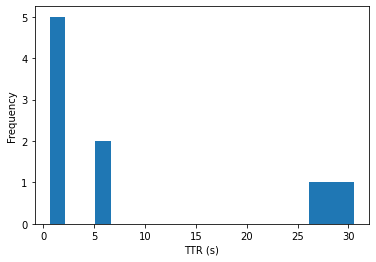

In [79]:
ax = d_1017_CPI_10['ttr'].plot.hist(bins=20)
ax.set_xlabel('TTR (s)')